In [1]:
#Reading Input Matrix and the Genes that were used for the Analysis
firstInputMatrix=read.table("firstRandomMatrix.csv",header=TRUE)
geneNames=firstInputMatrix[,1]
head(geneNames)
print(length(geneNames))

[1] FAM162A EMX2    PTER    CCL22   TMEM41A ALPL   
500 Levels: AATK ABCC11 AC009403.2 AC129778.1 ACSS3 ADAD1 ADAMTS10 ADD1 ... ZSWIM2

[1] 500


In [2]:
firstAdjacencyMatrix=readLines("firstAdjacencyMatrix.mat")

In [3]:
#Filtering out all Comments
firstAdjacencyMatrix=firstAdjacencyMatrix[-1*grep("^>",firstAdjacencyMatrix)]

In [4]:
rowWiseAdjacency=sapply(firstAdjacencyMatrix,function(line){
    allElements=strsplit(line,"\t")[[1]]
    #Filtering out all elements that don't begin with a number
    wordElements=allElements[grep("^[^0-9]",allElements)]
    gene=wordElements[1]
    partners=wordElements[-1]
    #print(gene)
    #print(length(partners))
    adjacencyRowPositions=sapply(partners,function(genePartner){return(which(geneNames==genePartner))})
    numericalRow=rep(0.0,length(geneNames))
    #Getting Number Elements
    numberElements=allElements[grep("^[0-9]",allElements)]
    #Plugging in MI values for the output matrix
    numericalRow[adjacencyRowPositions]= numberElements
    return(numericalRow)
})
colnames(rowWiseAdjacency)=NULL

In [5]:
#Since Genes Pair the pass the cutoff only are returned we can compute an adjacency matrix From that data.
#What I have done is a pretty inefficient implementation and things can be done better. But we will fix this later if we
#need a more efficient algorithm for getting this LogicalMatrix
print(dim(rowWiseAdjacency))

[1] 500 500


In [6]:
allMIData=sapply(firstAdjacencyMatrix,function(line){
    allElements=strsplit(line,"\t")[[1]]
    numberElements=allElements[grep("^[0-9]",allElements)]
    return(numberElements)
})

allMIData=as.numeric(unlist(allMIData))
print(length(allMIData))

[1] 246098


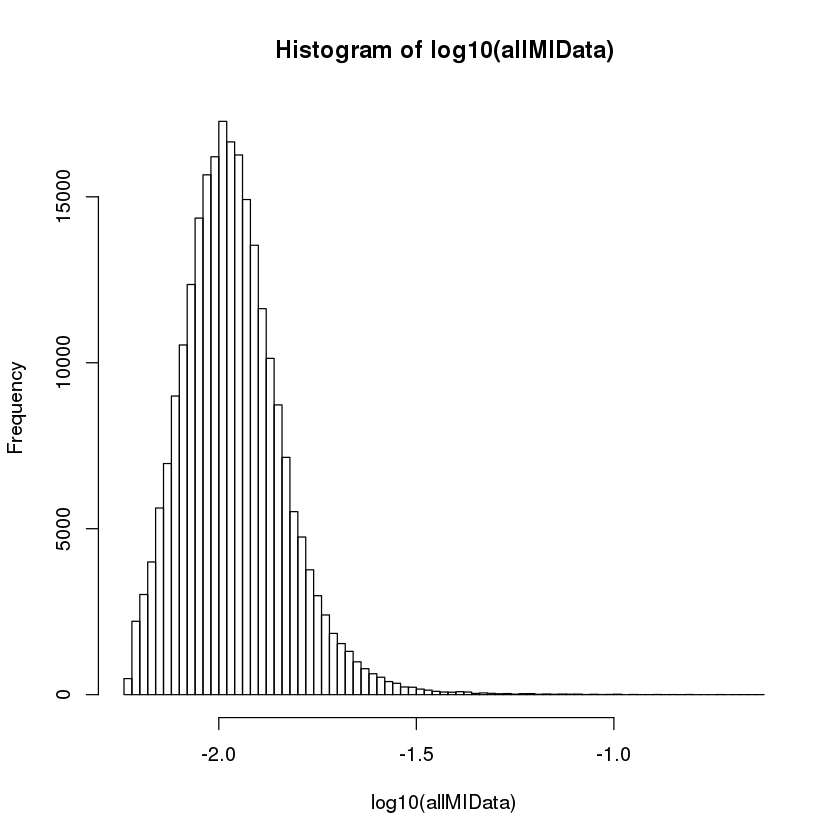

In [7]:
#As you can see this distribution is quite a clean normal or skewed normal. There is not biomodal point where you can cut
# the distribution. Our current statistical methods just do not work over here. Everything fails. Also the MI also used a gaussian kernel
# this is not very encouraging. Also most of my edges are present and the matrix is fully saturated. So even if I take an intersection 
#with another matrix formed from the other split dataset I am still going to get a huge overlap and this is not really an informative metric
#at that point.
hist(log10(allMIData),100)

In [8]:
#Reading Input Matrix and the Genes that were used for the Analysis
secondInputMatrix=read.table("secondRandomMatrix.csv",header=TRUE)
geneNames=secondInputMatrix[,1]
head(geneNames)
print(length(geneNames))

[1] FAM162A EMX2    PTER    CCL22   TMEM41A ALPL   
500 Levels: AATK ABCC11 AC009403.2 AC129778.1 ACSS3 ADAD1 ADAMTS10 ADD1 ... ZSWIM2

[1] 500


In [9]:
secondAdjacencyMatrix=readLines("secondAdjacencyMatrix.mat")

In [10]:
#Filtering out all Comments
secondAdjacencyMatrix=secondAdjacencyMatrix[-1*grep("^>",secondAdjacencyMatrix)]

In [11]:
rowWiseAdjacency2=sapply(secondAdjacencyMatrix,function(line){
    allElements=strsplit(line,"\t")[[1]]
    #Filtering out all elements that don't begin with a number
    wordElements=allElements[grep("^[^0-9]",allElements)]
    gene=wordElements[1]
    partners=wordElements[-1]
    #print(gene)
    #print(length(partners))
    adjacencyRowPositions=sapply(partners,function(genePartner){return(which(geneNames==genePartner))})
    numericalRow=rep(0.0,length(geneNames))
    #Getting Number Elements
    numberElements=allElements[grep("^[0-9]",allElements)]
    #Plugging in MI values for the output matrix
    numericalRow[adjacencyRowPositions]= numberElements
    return(numericalRow)
})
colnames(rowWiseAdjacency2)=NULL

In [12]:
print(dim(rowWiseAdjacency2))

[1] 500 500


In [13]:
allMIData2=sapply(secondAdjacencyMatrix,function(line){
    allElements=strsplit(line,"\t")[[1]]
    numberElements=allElements[grep("^[0-9]",allElements)]
    return(numberElements)
})

allMIData2=as.numeric(unlist(allMIData2))
print(length(allMIData2))

[1] 246060


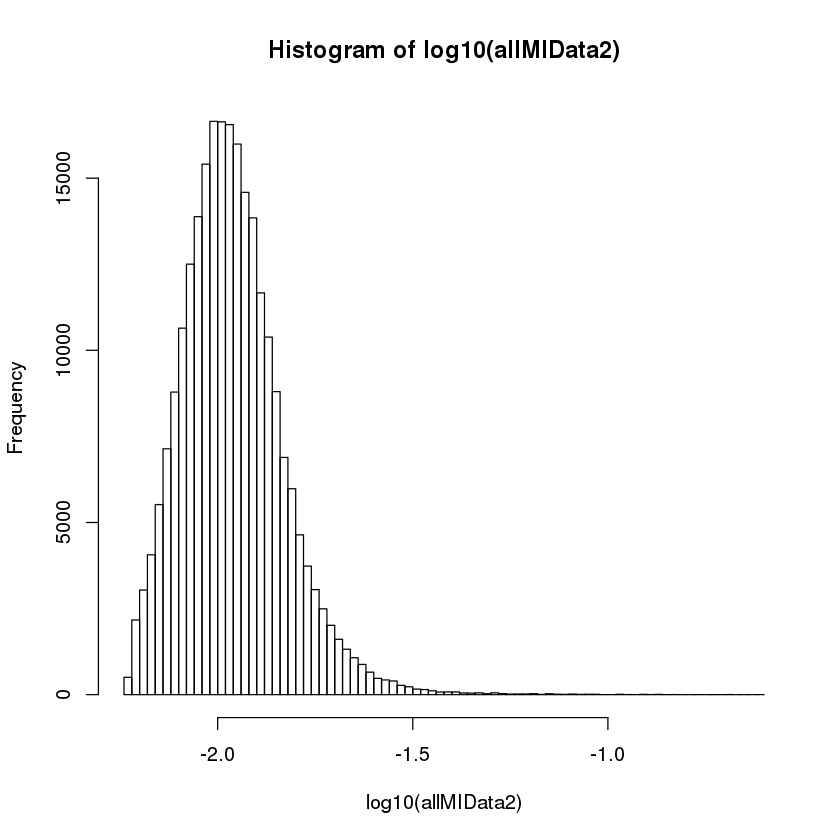

In [14]:
hist(log10(allMIData2),100)

In [15]:
#Printing a Small Portion to See if everything is OK
#Test Sample 1
rowWiseAdjacency[1:10,1:10]

0,0.00887994,0.01084226,0.0088733,0.00643212,0.00686724,0.01167191,0.01231324,0.01369867,0.01360028
0.00887994,0,0.00813275,0.00806692,0.0065684,0.00942785,0.00759545,0.00777898,0.00850029,0.00920827
0.01084226,0.00813275,0,0.00995585,0.00907674,0.00714113,0.04442193,0.01151796,0.00941894,0.00772831
0.0088733,0.00806692,0.00995585,0,0.01244869,0.00833369,0.01427846,0.01087616,0.00993583,0.00756167
0.00643212,0.0065684,0.00907674,0.01244869,0,0.01008613,0.00843161,0.01061855,0.00808792,0.00954565
0.00686724,0.00942785,0.00714113,0.00833369,0.01008613,0,0.00944889,0.01020764,0.01029273,0.01013477
0.01167191,0.00759545,0.04442193,0.01427846,0.00843161,0.00944889,0,0.01135765,0.00938123,0.01065644
0.01231324,0.00777898,0.01151796,0.01087616,0.01061855,0.01020764,0.01135765,0,0.01338756,0.01246138
0.01369867,0.00850029,0.00941894,0.00993583,0.00808792,0.01029273,0.00938123,0.01338756,0,0.01235722
0.01360028,0.00920827,0.00772831,0.00756167,0.00954565,0.01013477,0.01065644,0.01246138,0.01235722,0


In [16]:
#Printing a Small Portion to See if everything is OK
#Test Sample 2
rowWiseAdjacency2[1:10,1:10]

0,0.00800957,0.01596087,0.01140431,0.00886886,0.01356138,0.01364156,0.01159086,0.00764372,0.02088558
0.00800957,0,0.01200833,0,0.00883202,0.01387757,0.00949906,0.01016115,0.01341561,0.00686625
0.01596087,0.01200833,0,0.00682293,0.01353555,0.00859467,0.06562738,0.01414343,0.00850544,0.00838212
0.01140431,0,0.00682293,0,0.01413882,0.01177005,0.0157927,0.00939274,0.00632918,0.00978789
0.00886886,0.00883202,0.01353555,0.01413882,0,0.00997233,0.00843711,0.00743855,0.00949497,0.01004495
0.01356138,0.01387757,0.00859467,0.01177005,0.00997233,0,0.00706791,0.00816255,0.00924447,0.00920096
0.01364156,0.00949906,0.06562738,0.0157927,0.00843711,0.00706791,0,0.01598143,0.01229504,0.01197488
0.01159086,0.01016115,0.01414343,0.00939274,0.00743855,0.00816255,0.01598143,0,0.00872146,0.01255917
0.00764372,0.01341561,0.00850544,0.00632918,0.00949497,0.00924447,0.01229504,0.00872146,0,0.0164825
0.02088558,0.00686625,0.00838212,0.00978789,0.01004495,0.00920096,0.01197488,0.01255917,0.0164825,0


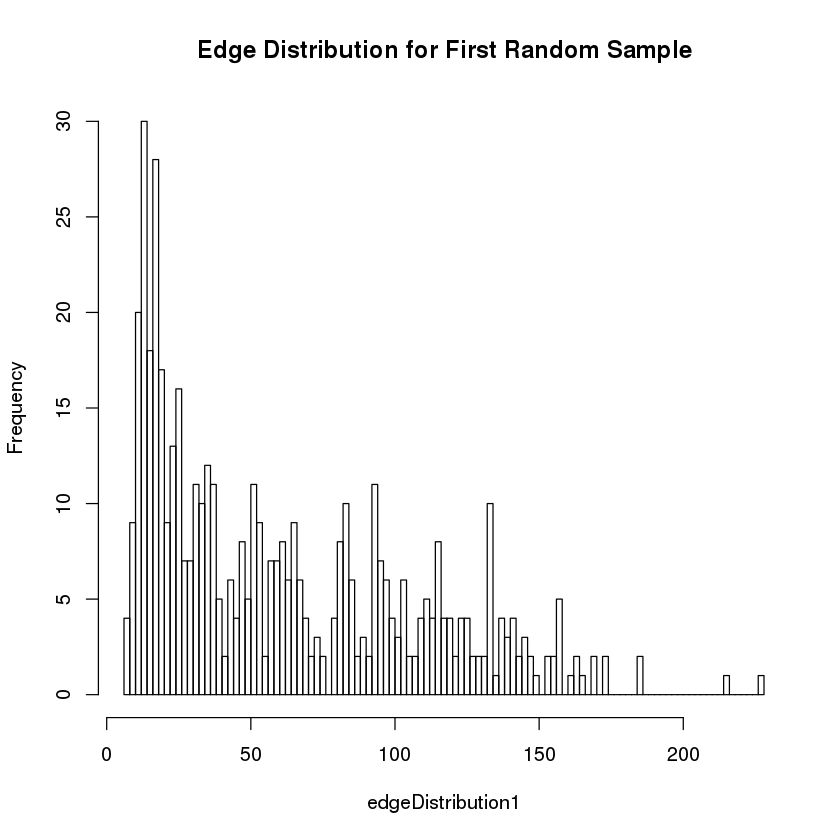

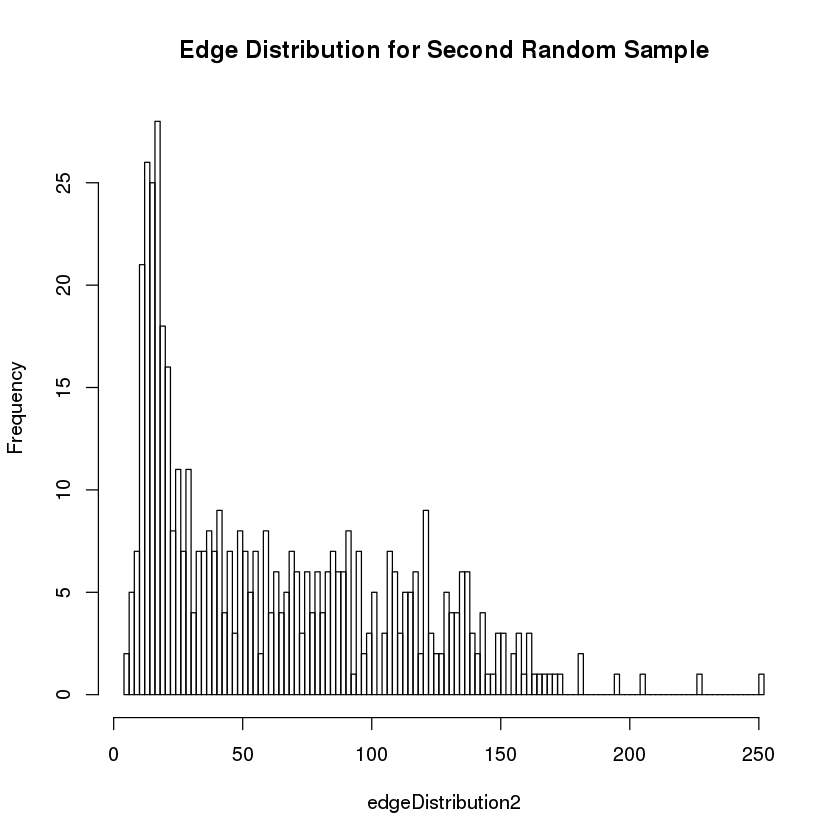

null device 
          1

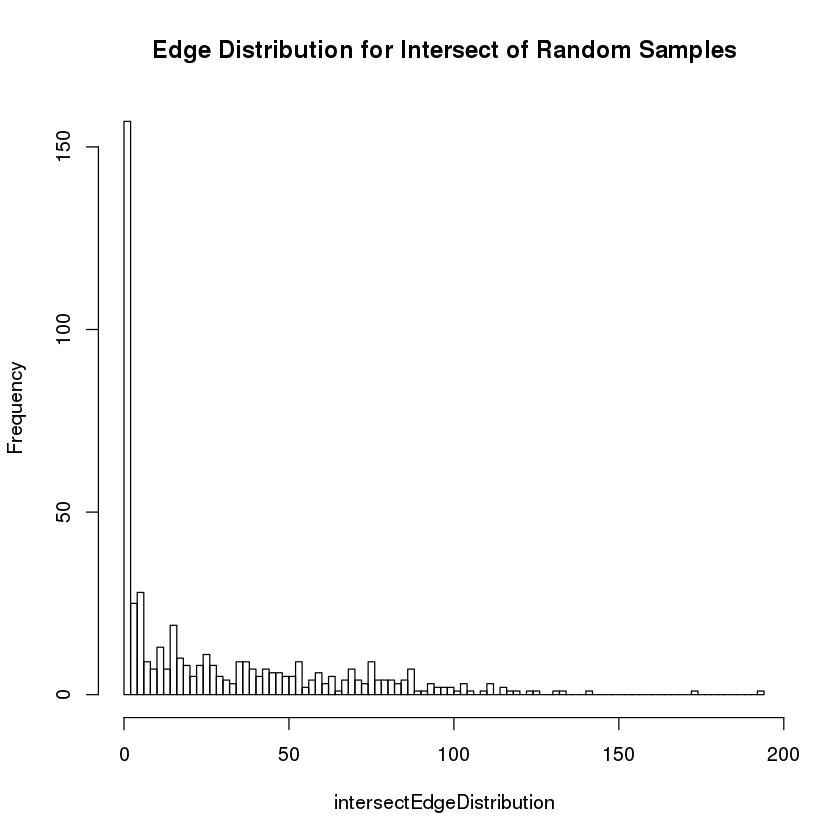

In [17]:
#Theshold is from Histogram. I choose 10^-1.7 with is approximately 0.02
logicalOutput1=(rowWiseAdjacency>=0.015)
diag(logicalOutput1)=FALSE
logicalOutput2=(rowWiseAdjacency2>=0.015)
diag(logicalOutput2)=FALSE
#pdf("Edge_Distribution_Statistics.pdf")
edgeDistribution1=apply(logicalOutput1,2,sum)
hist(edgeDistribution1,100, main = "Edge Distribution for First Random Sample")
edgeDistribution2=apply(logicalOutput2,2,sum)
hist(edgeDistribution2,100, main = "Edge Distribution for Second Random Sample")

#Getting Intersection of both outputs
intersectofOutputs=((logicalOutput1+logicalOutput2)>1)
diag(intersectofOutputs)=FALSE

intersectEdgeDistribution=apply(intersectofOutputs,2,sum)
hist(intersectEdgeDistribution,100, main = "Edge Distribution for Intersect of Random Samples")
dev.off()

In [18]:
print("Sparsity for Random Sample 1:")
sparsity1=sum(logicalOutput1)/(nrow(logicalOutput1)*ncol(logicalOutput1))
print(sparsity1)
print("Sparsity for Random Sample 2:")
sparsity2=sum(logicalOutput2)/(nrow(logicalOutput2)*ncol(logicalOutput2))
print(sparsity2)
print("Sparsity for Intersect of Random Samples:")
intersectSparsity=sum(intersectofOutputs)/(nrow(intersectofOutputs)*ncol(intersectofOutputs))
print(intersectSparsity)

[1] "Sparsity for Random Sample 1:"
[1] 0.122856
[1] "Sparsity for Random Sample 2:"
[1] 0.126664
[1] "Sparsity for Intersect of Random Samples:"
[1] 0.05744
